In [1]:

#%pip install pyodbc

In [162]:
# importing the necessary packages 

import pyodbc
import pandas as pd
import warnings
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings('ignore')

In [163]:
# create the servers instance variable such as the server you are connecting to, database , username anf password
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

# This will connection string is an f string that includes all the variable above to extablish a connection 
# to the server
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [164]:
# use the connect method of the pyodbc library and pass in the connection string. This will connect to the server and might
# take a few seconds to be complete. Check your internet connection if takes more time than necessary

connection = pyodbc.connect(connection_string)

In [165]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [170]:
data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head().T

,0,1,2,3,4
customerID,5600-PDUJF,8292-TYSPY,0567-XRHCU,1867-BDVFH,2067-QYTCF
gender,Male,Male,Female,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,No,No,Yes,Yes,Yes
Dependents,No,No,Yes,Yes,No
tenure,6,19,69,11,64
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,No,No,No phone service,Yes,Yes
InternetService,DSL,DSL,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,No,Yes,No,No


In [171]:
# You can concatenate this with other DataFrames to get one data set for your work
# df = pd.concat([data, data2])
# df.to_csv('concatinated.csv')

In [172]:
data.shape

(3000, 21)

In [173]:
data2.shape

(2043, 21)

In [174]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

# Some EDA

In [175]:
corr = data.corr()


In [176]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

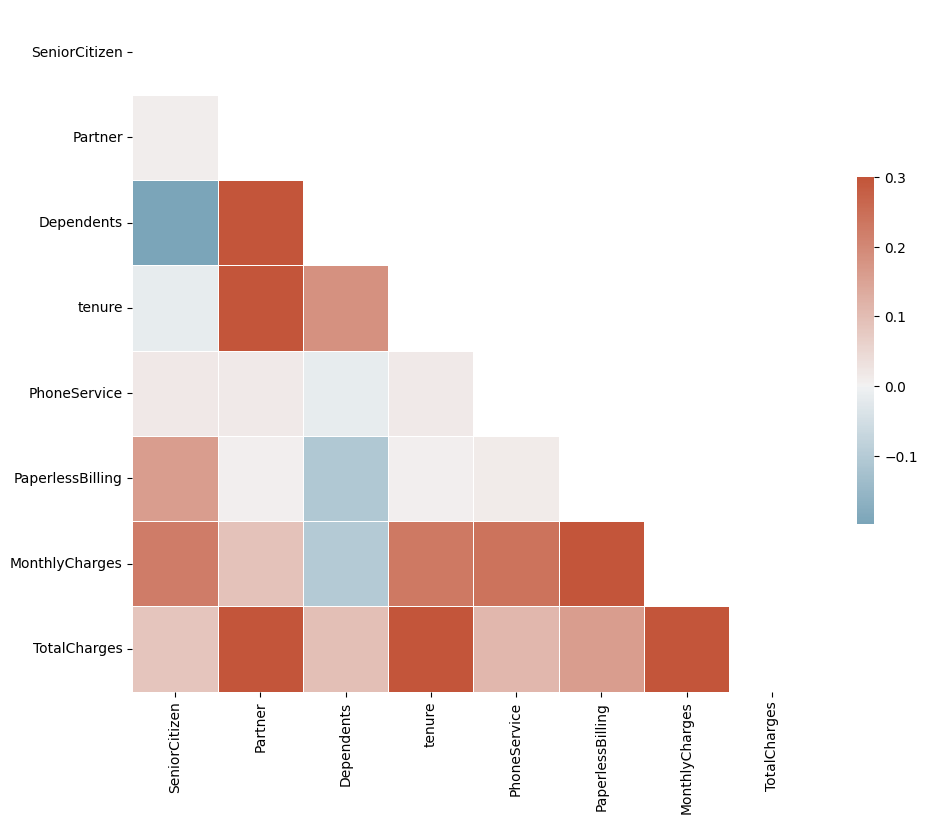

In [177]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

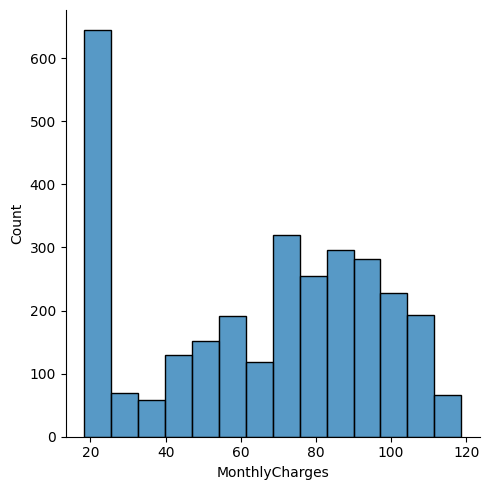

In [178]:
# distribution of monthly charges
sns.displot(data, x=data.MonthlyCharges)

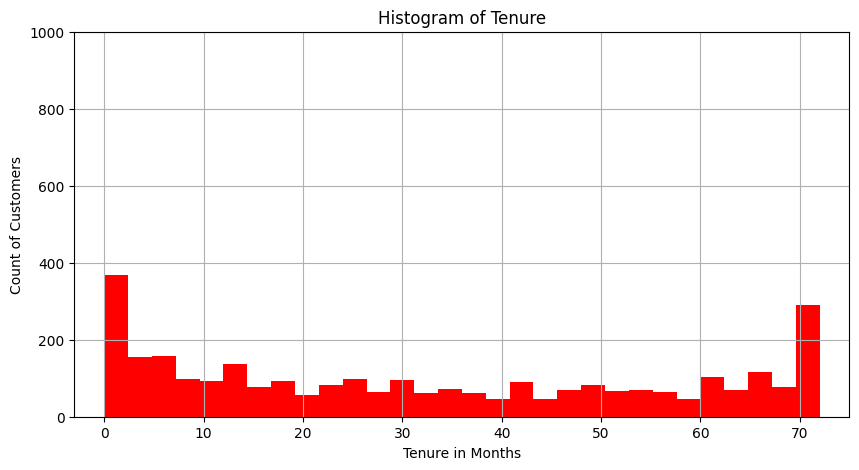

In [179]:
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(data.tenure, 30, facecolor='r', align='mid')


plt.xlabel('Tenure in Months')
plt.ylabel('Count of Customers')
plt.title('Histogram of Tenure')
plt.xlim(-3, 75)
plt.ylim(0, 1000)
plt.grid(True)
plt.show()

# Tenure by Months
* Customers at the beginning are most likely to churn 
* Customers also leave once they reach 70 months with the company

# How features affect churn?

### 1. First let us check Online security
* Null hypothesis = Online security feature doesn't affect churn
* Alternative hypothesis = Online security feature affect churn

#### A chi-square test is used to help determine if observed results are in line with expected results and to rule out that observations are due to chance.

In [180]:
# support and churn are two categorical features
# we can use the chi-square test for this
# import hypothesis testing
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
# set alpha first
alpha = .05

# create a cross table
table = pd.crosstab(data.Churn, data.OnlineSecurity)
print('Crosstab of churn and security:\n\n',table)

chi2, p, degf, expected = chi2_contingency(table)

print('\n\np = ',p)
print('\nRounded p value:',round(p,2))


Crosstab of churn and security:

 OnlineSecurity  False  True 
Churn                       
False             861    746
True              617    124


p =  2.6365457216168814e-43

Rounded p value: 0.0


#### Since p value is less than alpha value having online security affects a customer churning.
##### So we are reject Null hypothesis 

#### 2. Second let us check Tech support has impact on churn or not

* null hypothesis: having tech support does not affect churn
* alternative hypothesis: having tech support affects a customer churning

In [181]:
# support and churn are two categorical features
# we can use the chi-square test for this

# set alpha first
alpha = .05

# create a cross table
table = pd.crosstab(data.Churn, data.TechSupport)
print('Crosstab of churn and security:\n\n',table)

chi2, p, degf, expected = chi2_contingency(table)

print('\n\np = ',p)
print('\nRounded p_value:',round(p,2))

Crosstab of churn and security:

 TechSupport  False  True 
Churn                    
False          845    762
True           630    111


p =  2.579438071668035e-51

Rounded p_value: 0.0


similarly we are going to use chi square test 

#### 3. How does price Method affect churn?

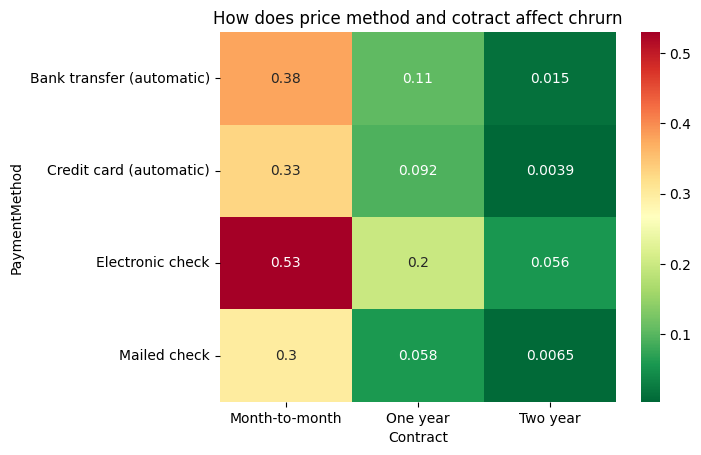

In [182]:
# create pivot table it can help us in multi-variant analysis
result = pd.pivot_table (data = data, index='PaymentMethod', columns = 'Contract', values= 'Churn')
sns.heatmap(result, annot=True, cmap='RdYlGn_r').set_title('How does price method and cotract affect chrurn')
plt.show()


We can directly see that customers with a month-to-month contract paying by electronic check are most likely to churn.  
While those with a two-year contract have a very low probability throughout.

#### 4 Does Online security or not cause different rates of churn?
* Null hypothesis: having online security does not affect churn
* Alternative hypothesis: having online security affects a customer churning

In [183]:

# set alpha first
alpha = .05

# create a cross table
table = pd.crosstab(data.Churn, data.OnlineSecurity)
print('Crosstab of churn and security:\n\n',table)

chi2, p, degf, expected = chi2_contingency(table)

print('\n\np = ',p)
print('\nRounded p_value:',round(p,2))

Crosstab of churn and security:

 OnlineSecurity  False  True 
Churn                       
False             861    746
True              617    124


p =  2.6365457216168814e-43

Rounded p_value: 0.0


* Null hypothesis rejected

Let’s look at the relationship between categorical and numerical variables:  
In our case, this would allow us to answer questions like 
* “Are churned customers likely to get charged more?”,  
* “When do customers churn?”, or “Are senior citizens more likely to churn?”.

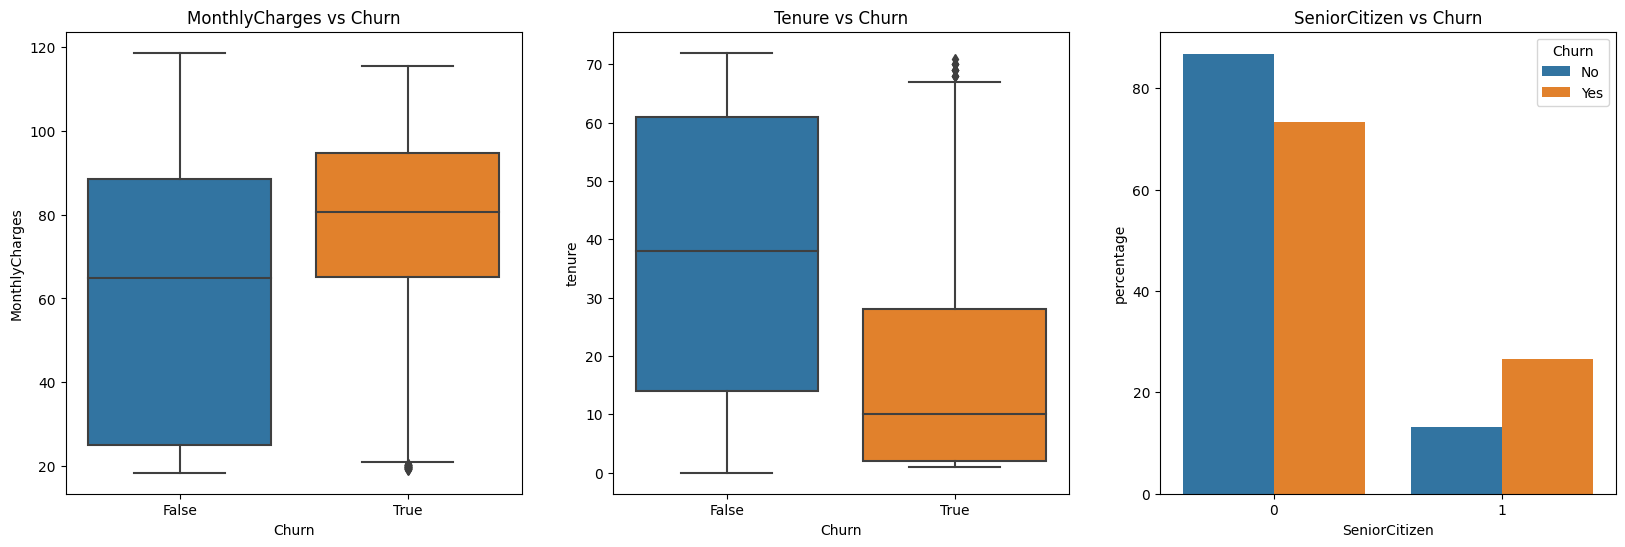

In [184]:
# Categorical-numerical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

## Are churned customers likely to get charged more?
plt.subplot(1,3,1)
sns.boxplot(x= data['Churn'],y= data['MonthlyCharges'])
plt.title('MonthlyCharges vs Churn')

## When do customers churn?
plt.subplot(1,3,2)
sns.boxplot(x=data['Churn'],y= data['tenure'])
plt.title('Tenure vs Churn')

## Are senior citizen more likely to churn?
plt.subplot(1,3,3)
counts = (data2.groupby(['Churn'])['SeniorCitizen']
  .value_counts(normalize=True)
  .rename('percentage')
  .mul(100)
  .reset_index())
plot = sns.barplot(x="SeniorCitizen", y="percentage", hue="Churn",
                   data=counts).set_title('SeniorCitizen vs Churn')
# plt.show()

* We can clearly see from this that monthly charges for churning customers are higher, while tenure is much lower.  
* For senior citizens, there are actually more customers churning than staying with the company.   
* This might be indicative that we’re not focusing on the right customer segment.

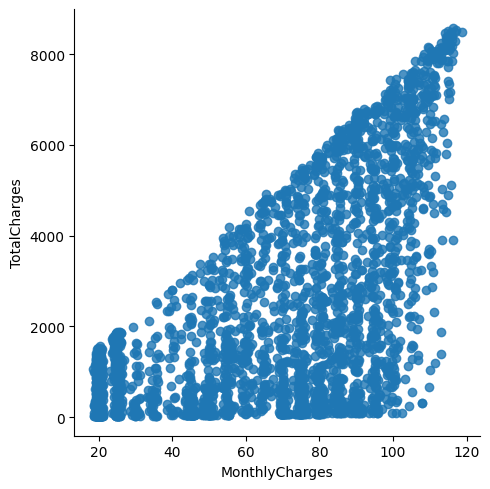

In [185]:
sns.lmplot(data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [186]:

# How many senior citizen does our dataset have anyway? 

senior_prop = round(data['SeniorCitizen'].value_counts(normalize=True)[0]*100,1)
nonsenior_prop = round(data['SeniorCitizen'].value_counts(normalize=True)[1]*100,1)

print('Our dataset consists of {}% non-senior citizen and {}% senior citizen.'.format(senior_prop, nonsenior_prop))

Our dataset consists of 84.2% non-senior citizen and 15.8% senior citizen.


# Preprocessing

In [187]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# importing hypothesis tests
# used for explore
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# importing functions to create the various models
# this project will use classification machine learning:
# Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbor
# used for modeling
from sklearn.feature_selection import SelectKBest
## Visualization
#from sklearn.metrics import plot_confusion_matrix


## ML
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, log_loss, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# importing functions to access model metrics, such as accuracy and the confusion matrix
# used for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix

#### Data Cleaning

In [188]:
# First, check for duplicate observations
print('Duplicate observations:', df.duplicated().sum())
np.sum(data.duplicated())

Duplicate observations: 0


0

In [189]:
# We can see the variables for gender are strings, to use in explore and modeling we will convert to a dummy variable
df.gender.value_counts()

Male      2559
Female    2484
Name: gender, dtype: int64

In [190]:
# Creates a data frame of gender dummy variables, if male == 1
df_dummies = pd.get_dummies(df.gender, drop_first=True)

# Add to the original df
df = pd.concat([df, df_dummies],axis=1)

# Drop the column, we do not need the string version of gender
df = df.drop('gender', axis=1)

# Checking the df that it was added correctly
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,False,True,False,1,False,None,DSL,False,True,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False,0
1,5575-GNVDE,False,False,False,34,True,False,DSL,True,False,...,False,False,False,One year,False,Mailed check,56.950001,1889.5,False,1
2,3668-QPYBK,False,False,False,2,True,False,DSL,True,True,...,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,1
3,7795-CFOCW,False,False,False,45,False,None,DSL,True,False,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False,1
4,9237-HQITU,False,False,False,2,True,False,Fiber optic,False,False,...,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,0


In [191]:
# Several columns are being represented by yes and no
# Going to replace Yes and No for any columns whose only value is Yes or No
# Ex: multiple lines includes yes, no, and no phone service
# Yes == 1, No == 0

df['Partner'] = df['Partner'].replace({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].replace({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1})
df['paperless_billing'] = df['PaperlessBilling'].replace({'No': 0, 'Yes': 1})
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
SeniorCitizen,False,False,False,False,False
Partner,True,False,False,False,False
Dependents,False,False,False,False,False
tenure,1,34,2,45,2
PhoneService,False,True,True,False,True
MultipleLines,None,False,False,None,False
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,False,True,True,True,False
OnlineBackup,True,False,True,False,False


In [192]:
#create a copy of data
data = data.copy()

In [193]:
#Total Charfe should be numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [194]:
#Removing missing values 
data.dropna(how = 'any', inplace = True)

In [195]:
# Renaming tenure to tenure_months before creating a tenure_years column
df = df.rename(columns = {'tenure':'tenure_months'})
df.head(1).T

,0
customerID,7590-VHVEG
SeniorCitizen,False
Partner,True
Dependents,False
tenure_months,1
PhoneService,False
MultipleLines,None
InternetService,DSL
OnlineSecurity,False
OnlineBackup,True


In [196]:
# Creating a new feature, tenure in years, by dividing tenure in months by 12
df['tenure_years'] = round(df.tenure_months / 12, 2)
df.head(1)

,customerID,SeniorCitizen,Partner,Dependents,tenure_months,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,paperless_billing,tenure_years
0,7590-VHVEG,False,True,False,1,False,None,DSL,False,True,...,False,Month-to-month,True,Electronic check,29.85,29.85,False,0,True,0.08


In [197]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)
data['tenure_group'].value_counts()

1 - 12     627
61 - 72    438
13 - 24    301
25 - 36    257
49 - 60    248
37 - 48    207
Name: tenure_group, dtype: int64

In [198]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
1,Male,False,False,False,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False,25 - 36
2,Male,False,False,False,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,1 - 12
4,Female,False,False,False,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,1 - 12
5,Female,False,False,False,True,True,Fiber optic,False,False,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True,1 - 12
6,Male,False,False,True,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False,13 - 24


In [199]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [200]:
#Convert all the categorical variables into dummy variables

telco_data_dummies = pd.get_dummies(data)
telco_data_dummies.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
1,False,False,False,True,False,56.950001,1889.500000,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,False,False,False,True,True,53.849998,108.150002,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,False,False,False,True,True,70.699997,151.649994,0,1,0,...,0,0,1,0,1,0,0,0,0,0
5,False,False,False,True,True,99.650002,820.500000,0,1,0,...,0,0,1,0,1,0,0,0,0,0
6,False,False,True,True,True,89.099998,1949.400024,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [201]:
telco_data_dummies.to_csv('data_churn.csv')

# Feature Engineering and Feature Selection

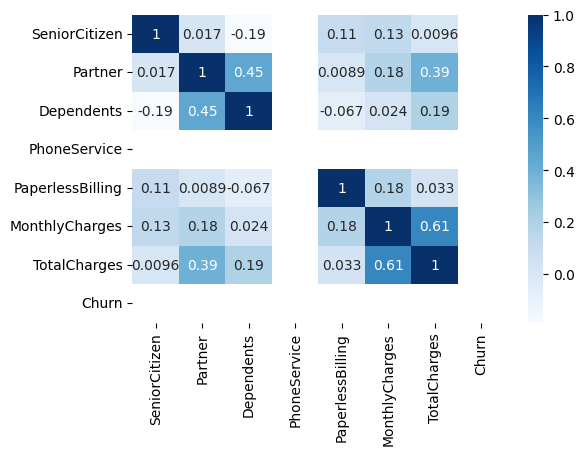

In [202]:
# Looking at multicollinearity with the feature matrix and selecting best features

plt.figure(figsize=(6,4))
correlations = data.corr()
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.show()

In [232]:
#accessing preprocessed data
data_raw = pd.read_csv('data_churn.csv')
data_raw

,Unnamed: 0,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1,False,False,False,True,False,56.950001,1889.500000,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,False,False,False,True,True,53.849998,108.150002,0,0,...,0,0,0,1,1,0,0,0,0,0
2,4,False,False,False,True,True,70.699997,151.649994,0,1,...,0,0,1,0,1,0,0,0,0,0
3,5,False,False,False,True,True,99.650002,820.500000,0,1,...,0,0,1,0,1,0,0,0,0,0
4,6,False,False,True,True,True,89.099998,1949.400024,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,2986,False,True,True,True,True,69.050003,3842.600098,0,1,...,0,1,0,0,0,0,0,0,1,0
2074,2991,True,True,False,True,False,90.000000,3371.750000,0,1,...,0,0,1,0,0,0,0,1,0,0
2075,2996,False,False,False,True,True,60.599998,1156.349976,0,1,...,0,0,0,1,0,1,0,0,0,0
2076,2997,True,True,False,True,True,89.949997,6143.149902,0,0,...,0,0,1,0,0,0,0,0,0,1


In [233]:
data_raw.drop('Unnamed: 0',axis=1)

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,False,False,False,True,False,56.950001,1889.500000,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,False,False,False,True,True,53.849998,108.150002,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,False,False,False,True,True,70.699997,151.649994,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,False,False,False,True,True,99.650002,820.500000,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,False,False,True,True,True,89.099998,1949.400024,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,False,True,True,True,True,69.050003,3842.600098,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2074,True,True,False,True,False,90.000000,3371.750000,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2075,False,False,False,True,True,60.599998,1156.349976,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2076,True,True,False,True,True,89.949997,6143.149902,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [234]:

# Separate features and target in the training data 
X = data_raw.drop(columns='Churn', axis=1)
y = data_raw['Churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
2073    0
2074    0
2075    0
2076    0
2077    0
Name: Churn, Length: 2078, dtype: int64

In [267]:
# We'll split the data to create a train and test set, and to avoid data leakage in preprocessing 


x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)


print('Data raw: {},\n train: {},\n test: {}.'.format(data_raw.shape, train.shape, test.shape))

Data raw: (2078, 40),
 train: (1558, 39),
 test: (520, 39).


#### Creating a pipeline

In [268]:
# Creating a scikit learn pipeline for preprocessing

## Selecting categorical and numeric features
numerical_ix = data_raw.select_dtypes(include=np.number).columns
categorical_ix = data_raw.select_dtypes(exclude=np.number).columns

## Create preprocessing pipelines for each datatype 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

## Putting the preprocessing steps together
preprocessor = ColumnTransformer([
        ('numerical', numerical_transformer, numerical_ix),
        ('categorical', categorical_transformer, categorical_ix)],
         remainder='passthrough')

In [269]:

data_raw.isna().sum()

Unnamed: 0                                 0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
MultipleLines_False                        0
MultipleLines_True                         0
InternetService_DSL                        0
InternetService_Fiber optic                0
OnlineSecurity_False                       0
OnlineSecurity_True                        0
OnlineBackup_False                         0
OnlineBackup_True                          0
DeviceProtection_False                     0
DeviceProtection_True                      0
TechSupport_False                          0
TechSuppor

In [270]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [271]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [242]:
# train = train.values
# test= test.values

In [272]:
pred=model_dt.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [273]:
model_dt.score(x_test,y_test)

1.0

In [274]:
print(classification_report(y_test, pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       520
   macro avg       0.50      0.50      0.50       520
weighted avg       1.00      1.00      1.00       520



In [275]:
knn = KNeighborsClassifier()

In [276]:
knn.__str__()

'KNeighborsClassifier()'

In [278]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [281]:
predknn=knn.predict(x_test)
predknn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [282]:
knn.score(x_test,y_test)

1.0

In [283]:
print(classification_report(y_test, predknn, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       520
   macro avg       0.50      0.50      0.50       520
weighted avg       1.00      1.00      1.00       520

